# IDDAS Information

## setup
below functions are needed to setup the sparql template and querying support

The endpoint is hard-coded in the python code

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from enable_sparql import execute_to_df, generate_sparql

All requests give us information about IDDAS:
- Property and type list
- Number of datasets, distributions, download URL and media type
- Information to catalogs list (numbers of datasets, download url and distribution)

This request shows us all the properties used in IDDAS and how many use.

In [5]:
all_props = execute_to_df('./sparql_requests/all_props.sparql')

print(all_props)

                                             property   count
0     http://www.w3.org/1999/02/22-rdf-syntax-ns#type  221445
1                      http://purl.org/dc/terms/title   87990
2                http://purl.org/dc/terms/description   72411
3                      http://www.w3.org/ns/prov#used   69427
4                             https://schema.org/name   56370
5                 https://schema.org/variableMeasured   56370
6              http://www.w3.org/ns/dcat#distribution   55957
7             http://www.w3.org/ns/dcat#accessService   51571
8             http://www.w3.org/ns/dcat#servesDataset   39320
9                   http://www.w3.org/ns/dcat#dataset   33112
10                   http://purl.org/dc/terms/creator   30810
11                http://www.w3.org/ns/dcat#accessURL   28749
12                   http://purl.org/dc/terms/spatial   22971
13                     http://www.w3.org/ns/dcat#bbox   22971
14                 http://purl.org/dc/terms/publisher   21824
15      

This request shows us all the types used in IDDAS and how many use.

In [6]:
all_types = execute_to_df('./sparql_requests/all_types.sparql')

all_types

,type,cnt
0,https://schema.org/PropertyValue,56370
1,http://www.w3.org/ns/dcat#Distribution,55957
2,http://www.w3.org/ns/dcat#Dataset,33112
3,https://schema.org/Dataset,33112
4,http://purl.org/dc/terms/Location,22971
5,http://purl.org/dc/terms/PeriodOfTime,17071
6,http://www.w3.org/2004/02/skos/core#Concept,1172
7,http://www.w3.org/ns/dcat#DataService,345
8,http://www.w3.org/ns/sosa/ObservedProperty,304
9,https://w3id.org/iadopt/ont/Variable,304


dcat:Catalog & hydra:PartialCollectionView

In [7]:
# predicates associated with dcat:Catalogs
execute_to_df('./sparql_requests/catalog_predicates.sparql')

,p
0,http://www.w3.org/1999/02/22-rdf-syntax-ns#type
1,http://www.w3.org/2000/01/rdf-schema#label
2,http://www.w3.org/ns/dcat#dataset
3,http://purl.org/dc/terms/title
4,http://purl.org/dc/terms/description
5,http://www.w3.org/ns/hydra/core#totalItems
6,http://www.w3.org/ns/hydra/core#itemsPerPage
7,http://www.w3.org/ns/hydra/core#firstPage
8,http://www.w3.org/ns/hydra/core#lastPage


In [8]:
execute_to_df('./sparql_requests/dcatCatalog.sparql')

# 11 dcat:Catalog
# 2 have additional type 'http://www.w3.org/ns/hydra/core#PartialCollectionView' 
# -> http://data.blue-cloud.wip/search/dcat/argo?page=1
# -> http://data.blue-cloud.wip/search/dcat/elixir?page=1'

,s,type
0,https://essi-lab.eu/dab/fair-ease/catalog/FROM...,http://www.w3.org/ns/dcat#Catalog
1,https://essi-lab.eu/dab/fair-ease/catalog/mari...,http://www.w3.org/ns/dcat#Catalog
2,https://essi-lab.eu/dab/fair-ease/catalog/wekeo,http://www.w3.org/ns/dcat#Catalog
3,https://essi-lab.eu/dab/fair-ease/catalog/usno...,http://www.w3.org/ns/dcat#Catalog
4,https://essi-lab.eu/dab/fair-ease/catalog/jrcd...,http://www.w3.org/ns/dcat#Catalog
5,https://essi-lab.eu/dab/fair-ease/catalog/UUID...,http://www.w3.org/ns/dcat#Catalog
6,https://essi-lab.eu/dab/fair-ease/catalog/emod...,http://www.w3.org/ns/dcat#Catalog
7,https://data.blue-cloud.org/search/dcat/argo?p...,http://www.w3.org/ns/dcat#Catalog
8,https://data.blue-cloud.org/search/dcat/argo?p...,http://www.w3.org/ns/hydra/core#PartialCollect...
9,https://data.blue-cloud.org/search/dcat/elixir...,http://www.w3.org/ns/dcat#Catalog


In [9]:
execute_to_df('./sparql_requests/partialCollectionView.sparql')

#properties associated with PartialCollectionView 
# http://www.w3.org/ns/hydra/core#totalItems
# http://www.w3.org/ns/hydra/core#itemsPerPage
# http://www.w3.org/ns/hydra/core#firstPage
# http://www.w3.org/ns/hydra/core#lastPage

#--> not in DCAT AP ?

,p,o
0,http://purl.org/dc/terms/title,Blue-Cloud DD&AS argo DCAT Catalog - Page 1
1,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.w3.org/ns/dcat#Catalog
2,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.w3.org/ns/hydra/core#PartialCollect...
3,http://purl.org/dc/terms/description,A DCAT catalog of argo records from the Blue-C...
4,http://www.w3.org/ns/dcat#dataset,https://data.blue-cloud.org/search/dcat/argo/r...
...,...,...
995,http://www.w3.org/ns/dcat#dataset,https://data.blue-cloud.org/search/dcat/argo/r...
996,http://www.w3.org/ns/dcat#dataset,https://data.blue-cloud.org/search/dcat/argo/r...
997,http://www.w3.org/ns/dcat#dataset,https://data.blue-cloud.org/search/dcat/argo/r...
998,http://www.w3.org/ns/dcat#dataset,https://data.blue-cloud.org/search/dcat/argo/r...


In [10]:
# predicates associated with dcat:Dataset
execute_to_df('./sparql_requests/dataset_predicates.sparql')

,p
0,http://purl.org/dc/terms/title
1,http://www.w3.org/1999/02/22-rdf-syntax-ns#type
2,http://www.w3.org/ns/dcat#theme
3,http://purl.org/dc/terms/description
4,http://purl.org/dc/terms/issued
5,http://www.w3.org/ns/dcat#distribution
6,http://purl.org/dc/terms/identifier
7,http://purl.org/dc/terms/temporal
8,http://purl.org/dc/terms/spatial
9,https://schema.org/variableMeasured


In [11]:
# values of triples: dcat:Dataset --prov:used--> object
execute_to_df('./sparql_requests/dataset_provused.sparql')

#values are literal (string), not a prov:Activity

,o
0,31
1,WRC
2,APEX_SBE
3,ARGO
4,US ARGO PROJECT
...,...
995,Citizen participation
996,Nature conservation
997,Zooplankton abundance
998,Algae Diatoms


In [12]:
# predicates associated with dcat:Distribution
execute_to_df('./sparql_requests/distribution_predicates.sparql')

,p
0,http://purl.org/dc/terms/title
1,http://www.w3.org/1999/02/22-rdf-syntax-ns#type
2,http://www.w3.org/ns/dcat#accessService
3,http://www.w3.org/ns/dcat#accessURL
4,http://www.w3.org/ns/dcat#downloadURL
5,http://purl.org/dc/terms/description
6,http://www.w3.org/ns/dcat#mediaType


In [13]:
# predicates associated with dcat:DataService
execute_to_df('./sparql_requests/dataservice_predicates.sparql')

,p
0,http://www.w3.org/1999/02/22-rdf-syntax-ns#type
1,http://purl.org/dc/terms/type
2,http://www.w3.org/ns/dcat#servesDataset
3,http://www.w3.org/ns/dcat#endpointURL
4,http://purl.org/dc/terms/conformsTo
5,http://www.w3.org/ns/dcat#endpointDescription
6,http://purl.org/dc/terms/description


This request shows us number of type per type per property

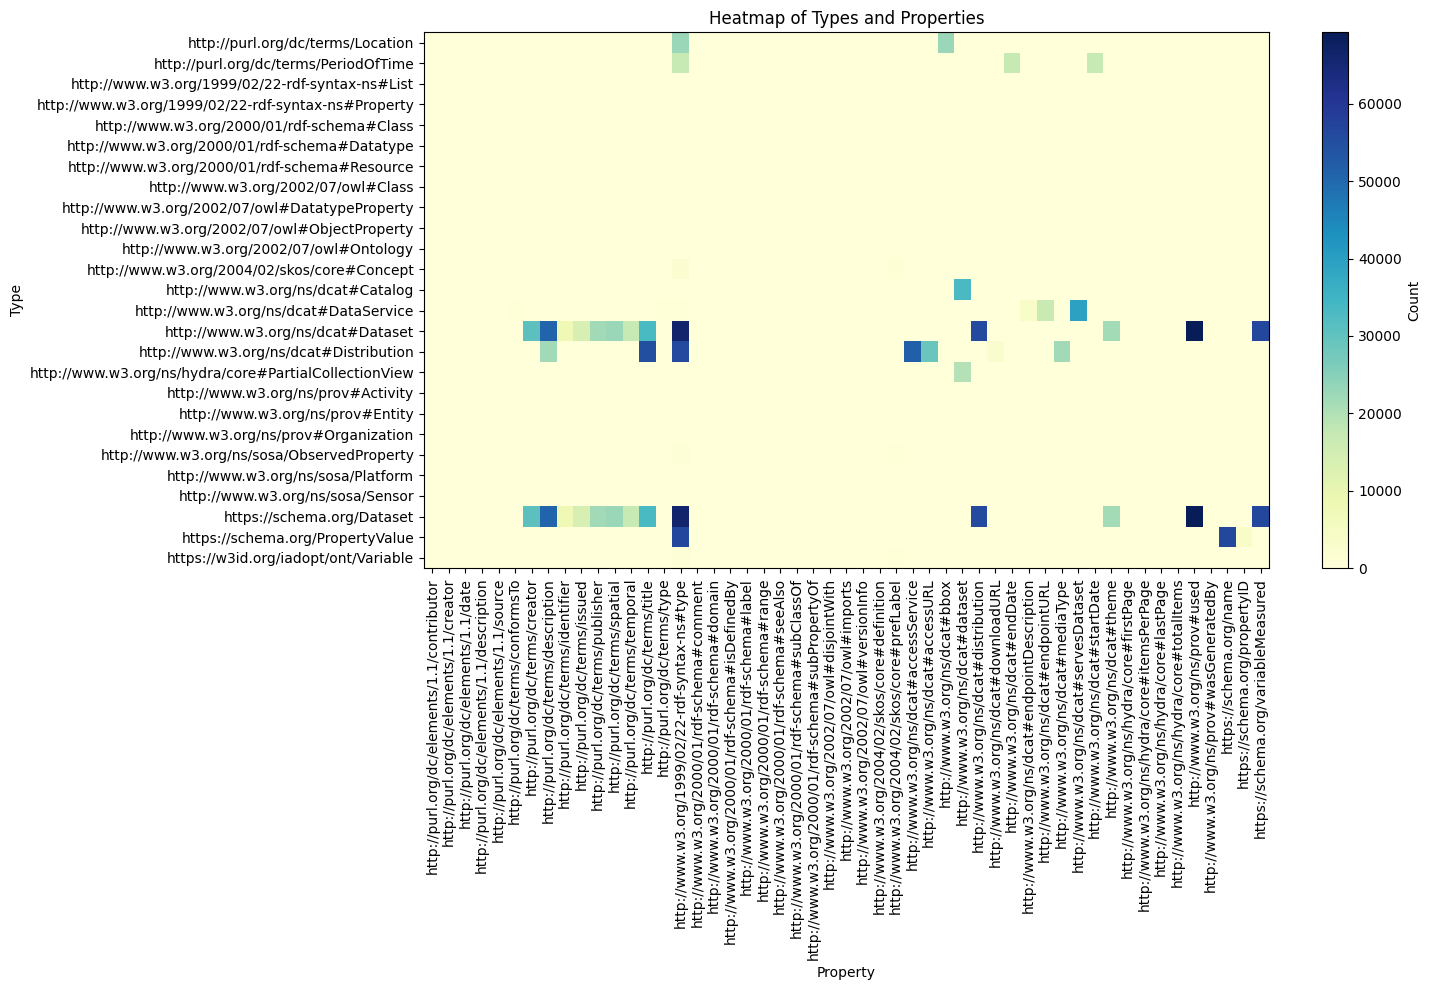

In [14]:
df = execute_to_df('./sparql_requests/all_types_props.sparql')

# Ensure that 'count' column is numeric
df['count'] = pd.to_numeric(df['count'])

# Create a pivot table to mix the counts for type and predicate
pivot_df = df.pivot_table(values='count', index='type', columns='property', aggfunc='sum', fill_value=0)

# Plotting the heatmap using matplotlib
plt.figure(figsize=(15, 10))
plt.imshow(pivot_df.values, cmap='YlGnBu', aspect='auto')
plt.colorbar(label='Count')
plt.xticks(ticks=range(len(pivot_df.columns)), labels=pivot_df.columns, rotation=90)
plt.yticks(ticks=range(len(pivot_df.index)), labels=pivot_df.index)
plt.xlabel('Property')
plt.ylabel('Type')
plt.title('Heatmap of Types and Properties')
plt.tight_layout()

# Show the plot
plt.show()

In [15]:
df

,property,type,count
0,http://www.w3.org/ns/prov#used,http://www.w3.org/ns/dcat#Dataset,69239
1,http://www.w3.org/ns/prov#used,https://schema.org/Dataset,69239
2,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.w3.org/ns/dcat#Dataset,66224
3,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,https://schema.org/Dataset,66224
4,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,https://schema.org/PropertyValue,56370
...,...,...,...
185,http://purl.org/dc/elements/1.1/date,http://www.w3.org/2002/07/owl#Ontology,1
186,http://purl.org/dc/elements/1.1/description,http://www.w3.org/2002/07/owl#Ontology,1
187,http://purl.org/dc/terms/description,http://www.w3.org/ns/dcat#DataService,1
188,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.w3.org/2002/07/owl#Ontology,1


Catalog list :
- Number of datasets
- Number of datasets with distribution
- Number of datasets with download URL
- Number of datasets with access URL
- Number of datasets with identifier
- Number of datasets with media type

In [16]:
df = execute_to_df('./sparql_requests/catalog_info.sparql')
df

,catalog_name,cnt_datasets,cnt_datasets_dist,cnt_datasets_dlurl,cnt_datasets_accessurl,cnt_datasets_id,cnt_datasets_mediatype
0,All catalog,33112,30410,1100,8507,7300,21775
1,WEkEO,2005,0,0,0,0,0
2,VITO /Copernicus Global Land Services,127,127,0,127,127,0
3,US NODC Collections,100,1,0,1,98,0
4,Joint Research Centre Data Catalog,3501,3162,0,3162,0,0
5,European Marine Observation and Data Network (...,4605,4348,1013,4220,3787,0
6,European Environment Agency SDI Catalog,722,720,87,720,718,0
7,Copernicus Marine Environment Monitoring Servi...,277,277,0,277,277,0
8,Blue-Cloud DD&AS argo DCAT Catalog - Page 1,10000,10000,0,0,0,10000
9,Blue-Cloud DD&AS SIOS Svalbard DCAT Catalog,158,158,0,0,158,158


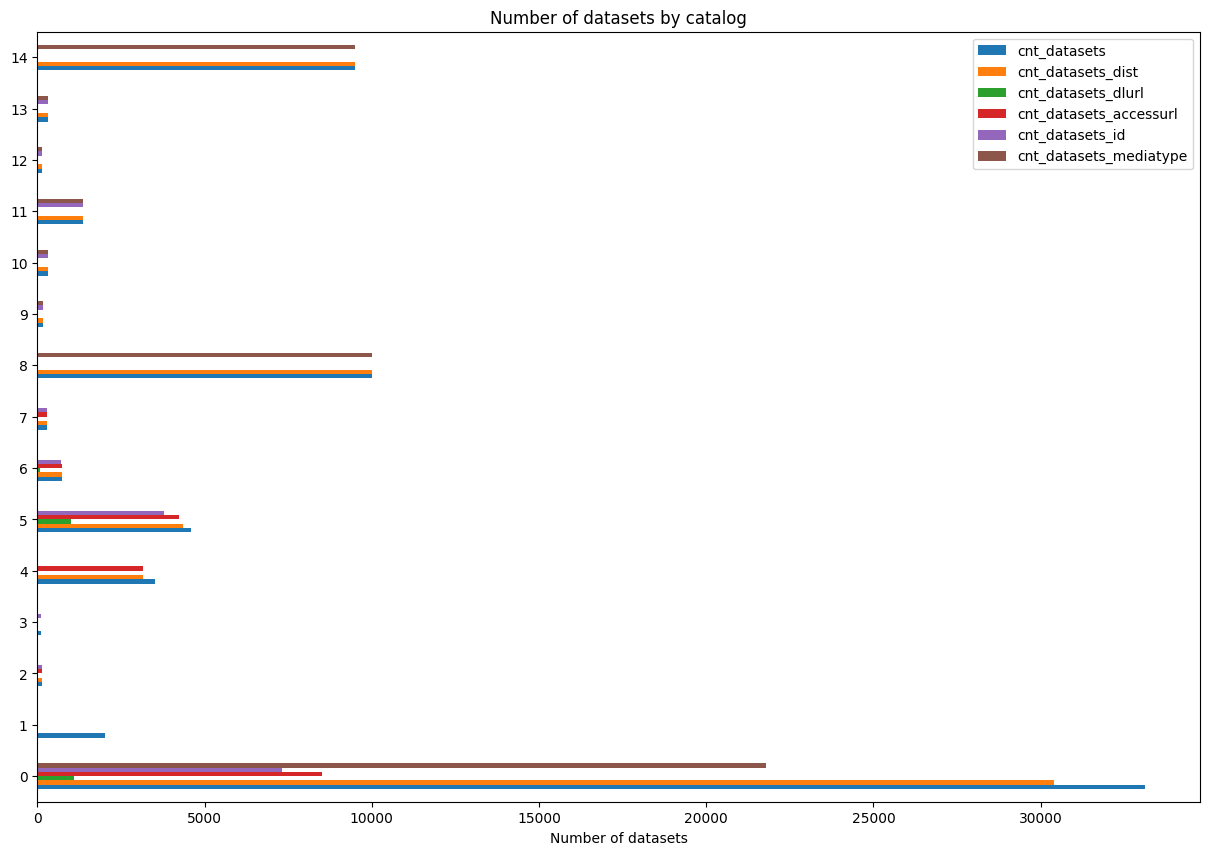

In [17]:
numeric_columns = [
    'cnt_datasets', 'cnt_datasets_dist', 'cnt_datasets_dlurl', 
    'cnt_datasets_accessurl', 'cnt_datasets_id', 'cnt_datasets_mediatype'
]

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

plot_data = df[numeric_columns]
plot_data.plot(kind='barh', figsize=(15, 10))
plt.title('Number of datasets by catalog')
plt.xlabel('Number of datasets')
plt.show()
